In [2]:
import numpy as np
import math
import itertools
import sys
# %matplotlib widget
import matplotlib.pyplot as plt
import copy

from scipy.interpolate import UnivariateSpline
from mpl_toolkits import mplot3d
from ripser import ripser
from persim import plot_diagrams
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from matplotlib.ticker import StrMethodFormatter, FormatStrFormatter

%load_ext autoreload
%autoreload 2
import cup_quasi_periodic_detection as cqpd

In [3]:
t1 = np.linspace(0, 60*2*np.pi, 2000, endpoint=False)

curve1 = np.array([np.zeros(len(t1)), -np.sin(t1), 2 - np.cos(t1)]).transpose()

In [4]:
curve1.shape

(2000, 3)

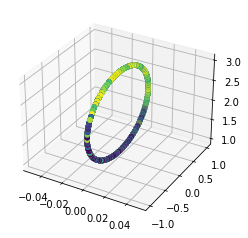

In [5]:
# Creating figure
fig = plt.figure()
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(curve1[:,0], curve1[:,1], curve1[:,2], c = t1)

In [6]:
t2 = np.linspace(60*2*np.pi, 120*2*np.pi, 2000, endpoint=False)

angles = np.column_stack((t2, (1/60)*(1/2)*t2))

def s2 (phi, theta):
    x = np.cos(phi)*np.sin(theta)
    y = np.sin(phi)*np.sin(theta)
    z = np.cos(theta)
    
    return np.array([x,y,z])

curve2 = np.array([s2(l[0], l[1]) for l in angles])

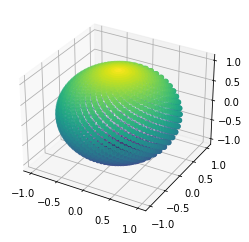

In [7]:
# Creating figure
fig = plt.figure()
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(curve2[:,0], curve2[:,1], curve2[:,2], c = t2)

In [8]:
t3 = np.linspace(120*2*np.pi, 180*2*np.pi, 2000, endpoint=False)

curve3 = np.array([np.sin(t3), np.zeros(len(t3)), -2 + np.cos(t3)]).transpose()

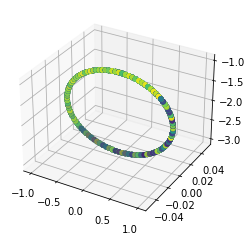

In [9]:
# Creating figure
fig = plt.figure()
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(curve3[:,0], curve3[:,1], curve3[:,2], c = t3)

In [10]:
complete_t = np.row_stack((t1.reshape([-1,1]), t2.reshape([-1,1]), t3.reshape([-1,1])))

complete_curve = np.row_stack([curve1, curve2, curve3])

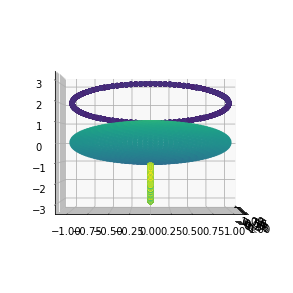

In [11]:
# Creating figure
fig = plt.figure(figsize=(5,15))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(complete_curve[:,0], complete_curve[:,1], complete_curve[:,2], c = complete_t.reshape(-1))
ax.view_init(0, 0)

In [12]:
time_series = np.arccos(np.dot(complete_curve, [1/4, 1/4, 1/4]))

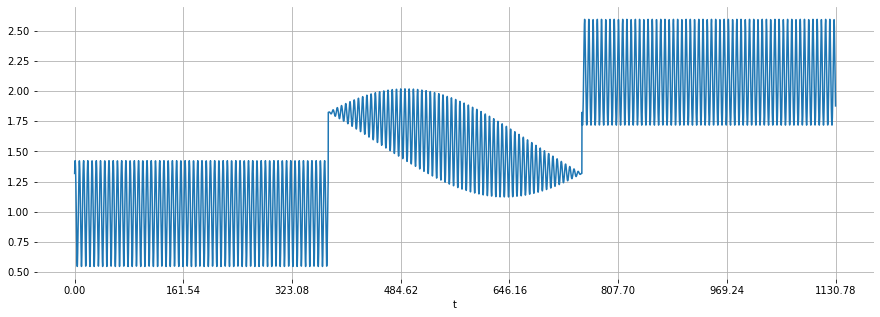

In [13]:
fig = plt.figure(figsize=(15,5))

ax = plt.plot(complete_t, time_series)
plt.xlabel('t')
plt.grid()
plt.box(on=None)

x_ticks = complete_t[0: len(complete_t) : int(len(complete_t)/7)]
x_ticks = x_ticks.reshape(-1)

plt.xticks(x_ticks, x_ticks)

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

In [18]:
d = 5
w = 2*np.pi*d/(d+1)

pc = cqpd.sw_map(time_series, complete_t, w, d, 10000)

TypeError: 'float' object cannot be interpreted as an integer

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=3)
pca.fit(pc)

pc_pca = pca.transform(pc)

NameError: name 'pc' is not defined

NameError: name 'pc_pca' is not defined

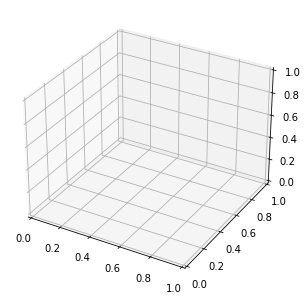

In [17]:
# Creating figure
fig = plt.figure(figsize=(5,15))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(pc_pca[:,0], pc_pca[:,1], pc_pca[:,2])

ax.view_init(30, 30)
plt.show()

In [ ]:
res = ripser(pc, maxdim=2, n_perm=400, do_cocycles=True)

In [ ]:
plot_diagrams(res['dgms'])

In [ ]:
diagrams = res['dgms']
cocycles = res['cocycles']

# H_1 processing and sorting

H_1 = cocycles[1]
H_1_diagram = diagrams[1]
H_1_persistence = H_1_diagram[:,1] - H_1_diagram[:,0]
H_1_persistence_sort_ind = H_1_persistence.argsort()

# Cup product 

cocycle_1_ind = -1
cocycle_2_ind = -2

cocycle_1 = H_1[H_1_persistence_sort_ind[cocycle_1_ind]]
cocycle_2 = H_1[H_1_persistence_sort_ind[cocycle_2_ind]]

In [ ]:
cup = cqpd.cup_product_cochains(cocycle_1, cocycle_2, 2)

In [ ]:
cup

In [ ]:
for i in range(10):
    print(i)

In [ ]:
i

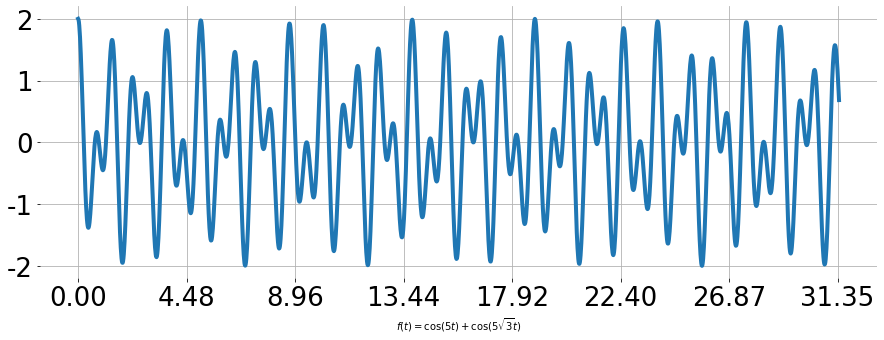

In [29]:
n = 2000

np.random.seed(13)

t = np.linspace(0,10*np.pi, n)

f = np.cos(5*t) + np.cos(5*np.sqrt(3)*t)

# Plot time series
fig = plt.figure(figsize=(15,5))

ax = plt.plot(t, f, linewidth=4)
plt.xlabel(r'$f(t) = \cos(5t) + \cos(5\sqrt{3}t)$')
plt.grid()
plt.box(on=None)

x_ticks = t[0: len(t) : int(len(t)/7)]
x_ticks = x_ticks.reshape(-1)

plt.xticks(x_ticks, x_ticks, fontsize=26)

y_ticks = np.array([-2,-1,0,1,2])
y_ticks = y_ticks.reshape(-1)

plt.yticks(y_ticks, y_ticks, fontsize=26)

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.savefig('quasi_intro.png', bbox_inches = 'tight')

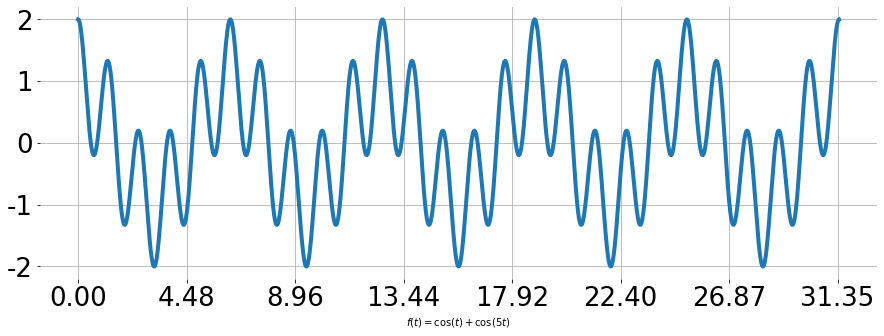

In [30]:
n = 2000

np.random.seed(13)

t = np.linspace(0,10*np.pi, n)

f = np.cos(t) + np.cos(5*t)

# Plot time series
fig = plt.figure(figsize=(15,5))

ax = plt.plot(t, f, linewidth=4)
plt.xlabel(r'$f(t) = \cos(t) + \cos(5t)$')
plt.grid()
plt.box(on=None)

x_ticks = t[0: len(t) : int(len(t)/7)]
x_ticks = x_ticks.reshape(-1)

plt.xticks(x_ticks, x_ticks, fontsize=26)

y_ticks = np.array([-2,-1,0,1,2])
y_ticks = y_ticks.reshape(-1)

plt.yticks(y_ticks, y_ticks, fontsize=26)


plt.xticks(x_ticks, x_ticks)

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.savefig('perio_intro.png', bbox_inches = 'tight')